In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import io
import scipy.io as sio
%matplotlib inline 
import pylab
import csv
from Tkinter import Tk
from tkFileDialog import askopenfilename
from tkFileDialog import askdirectory
import nibabel as nb
from scipy import io
#from nifti import NiftiImage
import nibabel as nb
from scipy.interpolate import interp1d
from scipy import ndimage

# Open data

In [2]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/862_863/180315/863ss2onc250_862ss2onc250zx2cregcregc862_863dFF20spsfkf221Smith0_4_60TS.mat


In [3]:
Ua=sio.loadmat(filename)
DT=Ua['TSo']
DT.shape

(5957, 221)

In [7]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)
Ua2=sio.loadmat(filename)
DTroi=Ua2['TSzmapo']
DTroi.shape

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/862_863/180315/863ss2onc250_862ss2onc250zx2cregcregc862_863dFF20spsfkf221Smith0_4_60TSzmap.mat


(5957, 221)

In [8]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename2 = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename2)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/862_863/180315/863ss2onc250_862ss2onc250zx2cregcregc862_863dFF20spsfkf221Smith0_4_60IC.nii


In [9]:
img1 = nb.load(filename2)
data = img1.get_data()
S=data.shape
S

(174, 93, 12, 221)

In [10]:
S=data.shape
S

(174, 93, 12, 221)

In [12]:
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/862_863/862ForAlignement/862ss2TimeFluoOn.mat


In [13]:
Ua

{'TSo': array([[-0.06328288, -0.01913349, -0.03646518, ..., -0.00772999,
         -0.00504428,  0.00713654],
        [-0.05138761, -0.02416403, -0.02547583, ...,  0.02153099,
          0.00444384,  0.00945623],
        [-0.03854798, -0.01807164, -0.02093255, ...,  0.00586181,
         -0.00384203, -0.01072456],
        ..., 
        [-0.0671341 , -0.02341208, -0.03245438, ...,  0.0071786 ,
          0.00368829,  0.00595579],
        [-0.06064615, -0.02730565, -0.03300309, ..., -0.00332765,
          0.00421654,  0.01009815],
        [-0.05592239, -0.02749929, -0.03175372, ..., -0.0010726 ,
          0.00012818,  0.00484986]]),
 '__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Mar 15 13:43:52 2018',
 '__version__': '1.0'}

In [14]:
Ua=sio.loadmat(filename)
Time_fluo862=np.squeeze(Ua['TimeFluoOn'])

In [15]:
Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filename)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/862_863/863foralignement/863ss2TimeFluoOn.mat


In [16]:
Ua2=sio.loadmat(filename)
Time_fluo863=np.squeeze(Ua2['TimeFluoOn'])
Time_fluo863.shape

(3292,)

In [17]:
Time_fluoICA=Time_fluo862[range(251,Time_fluo862.shape[0])]

In [18]:
A=Time_fluo862[range(251,Time_fluo862.shape[0])]
B=Time_fluo863[range(251,Time_fluo863.shape[0])]+np.max(Time_fluo862)
Time_fluoICA=np.concatenate([A,B])

In [19]:
Time_fluoICA.shape

(5957,)

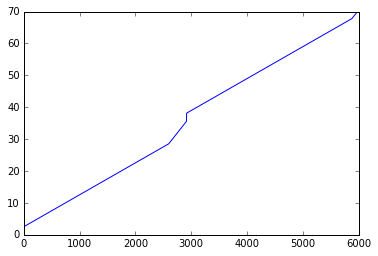

In [20]:
plt.plot(np.squeeze(Time_fluoICA))

Z-score

In [21]:
Demean=np.zeros(S)
Dmaps=np.zeros(S)
Dvar=np.zeros(S)
Var=np.zeros(S[3])
D2=np.zeros([S[0],S[1],5,S[3]])
Tvar=np.zeros(S[3])

In [22]:
for i in range(S[3]):
    Demean[:,:,:,i]=data[:,:,:,i]-np.mean(np.mean(np.mean(data[:,:,:,i],0),0),0)

In [23]:
for i in range(S[3]):
    Dsq=np.reshape(Demean[:,:,:,i],S[0]*S[1]*S[2])
    Var[i]=np.sqrt(np.var(Dsq))
    Dvar=Demean[:,:,:,i]/Var[i]
    Dmaps[:,:,:,i]=Dvar-2.5
    Tvar[i]=np.var(DT[i,:])
Dmaps[Dmaps<0]=0

# Open Masks

In [24]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenameM = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenameM)
img1 = nb.load(filenameM)
Masks = img1.get_data()
Sm=Masks.shape
Masks=np.array(Masks)

/media/sophie/008C0665790F0763/ComboPanNeuronalGCaMP6/862_863/862_863registration/862ResizedMapsfullpsftrimmed.nii


In [25]:
filenameM='/home/sophie/RegionList'
with open(filenameM) as f:
    content = f.readlines()
Names=[Line.split('\t') for Line in content]
RegionName=[Names[i][0] for i in range(75)]
Num=[int(Names[i][2]) for i in range(75)]

# Average in masks to sort components by brain region

In [26]:
Dmaps.shape

(174, 93, 12, 221)

In [27]:
M=np.zeros((S[3],86))
Mapmean=np.zeros(S[3])
MMasks=np.zeros(86)

In [28]:
for i in range(S[3]):
    Mapmean[i]=np.mean(np.mean(np.mean(Dmaps[:,:,:,i])))
    for j in range(86):
        MMasks[j]=np.mean(np.mean(np.mean(Masks[:,:,:,j])))
        if MMasks[j]:
            M[i,j]=np.mean(np.mean(np.mean(Masks[:,:,:,j]*Dmaps[:,:,:,i])))/(MMasks[j]*Mapmean[i])

In [29]:
CompMainName=S[3]*['']
CompNameAdd=np.zeros((S[3],86))
for i in range(S[3]):
    Max=np.max(M[i,:])
    I=np.argmax(M[i,:])+1
    for j in range(86):
        J=[l for l in range(74) if Num[l]==(j+1)]
        if M[i,j]>0.2*Max:
            CompNameAdd[i,J]=1
    J=[l for l in range(74) if Num[l]==I]
    if J!= []:
        CompMainName[i]=Names[np.array(J)][0]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


In [30]:
J

[69]

LO_R
LOP_R
29
LO_R
LOP_R
38
LO_R
LOP_R
85
LO_R
LOP_R
ME_R
101
LO_R
128
LO_R
131
LO_R
BU_R
ME_R
166
lobula


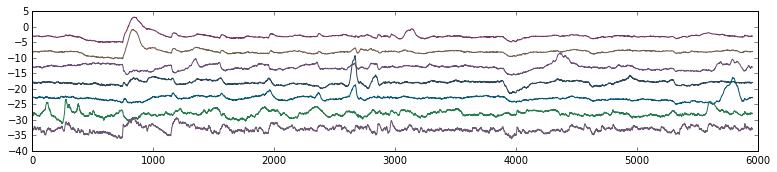

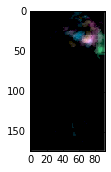

BU_R
BU_L
ME_L
34
BU_R
ATL_R
ME_L
157
BU_R
178
bulb


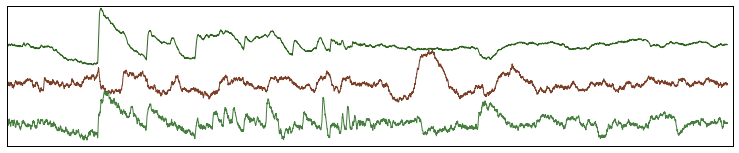

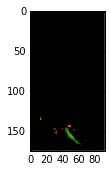

PB
ATL_L
43
PB
ATL_L
49
PB
ATL_R
80
PB
ATL_L
103
protocerebral bridge


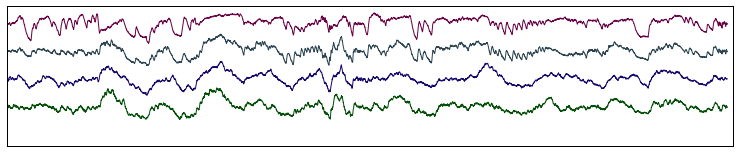

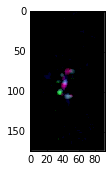

LH_R
MB_CA_R
0
LH_R
GA_R
3
LH_R
6
LH_R
MB_CA_R
42
LH_R
PLP_R
50
LH_R
118
lateral horn


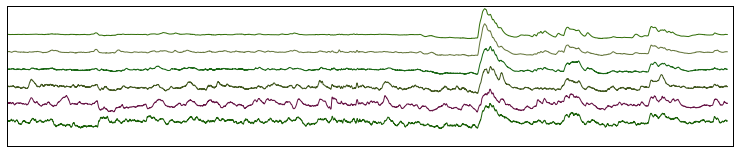

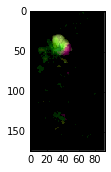

AMMC_R
13
SAD
AMMC_R
IVLP_R
IPS_R
31
antennal mechanosensory and motor center


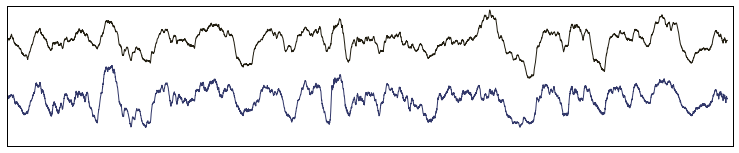

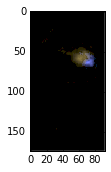

PB
ATL_R
46
IB_R
ATL_R
SMP_R
SMP_L
116
ATL_R
ME_L
133
antler


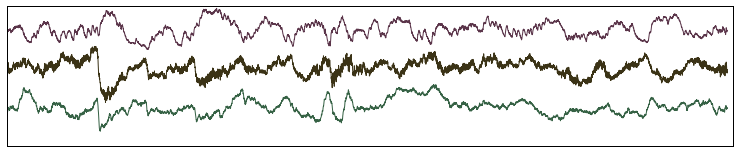

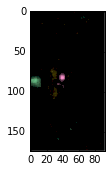

MB_PED_R
MB_VL_R
68
vertical lobe of adult mushroom body


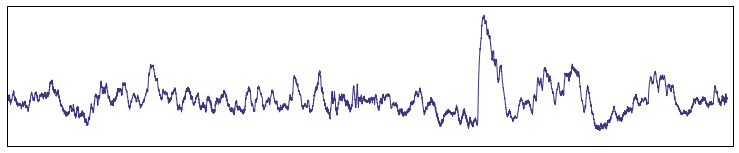

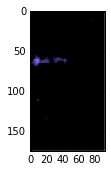

CRE_R
MB_PED_R
MB_ML_R
9
MB_VL_R
MB_ML_R
SIP_R
10
CRE_R
MB_ML_R
MB_ML_L
120
medial lobe of adult mushroom body


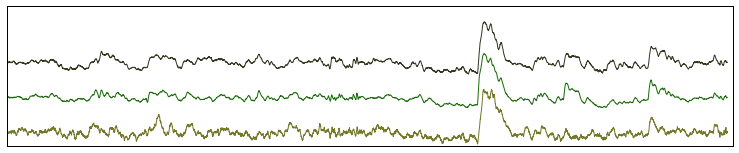

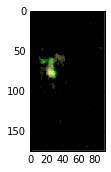

LOP_R
ME_R
44
AME_R
LO_R
LOP_R
137
lobula plate


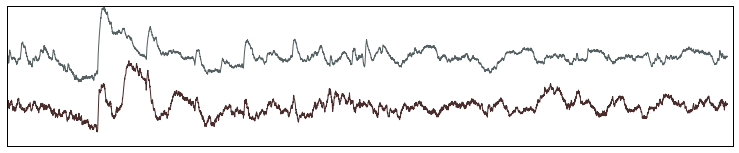

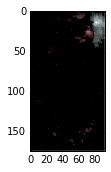

EB
123
EB
136
EB
162
ellipsoid body


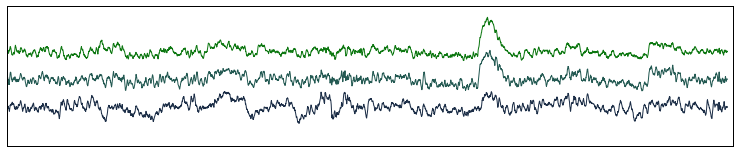

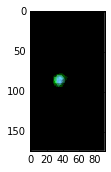

AL_R
AL_L
14
LAL_R
AL_R
AL_L
18
LAL_R
AL_R
MB_CA_R
GA_R
26
LAL_R
AL_R
AVLP_R
61
LAL_R
AL_R
79
VES_R
AL_R
82
LAL_R
AL_R
165
adult antennal lobe


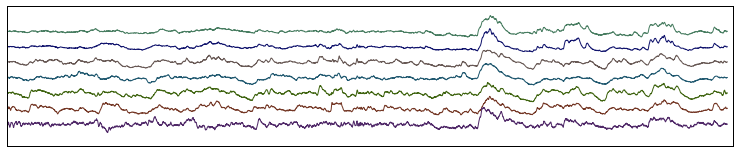

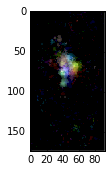

ME_R
15
ME_R
17
ME_R
23
ME_R
41
LO_R
LOP_R
ME_R
59
ME_R
BU_L
63
ME_R
66
ME_R
SPS_R
ME_L
SPS_L
67
LO_R
ME_R
70
BU_R
LOP_R
ME_R
72
LO_R
LOP_R
ME_R
73
ME_R
78
LO_R
LOP_R
ME_R
88
LO_R
ME_R
113
LO_R
ME_R
121
LO_R
ME_R
124
ME_R
159
ME_R
GA_R
SIP_L
164
medulla


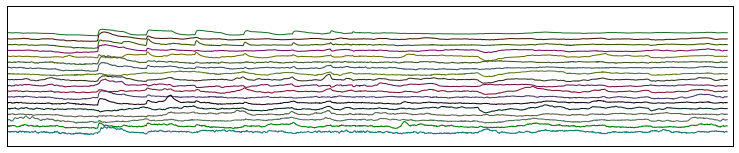

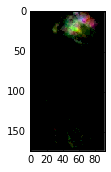

EB
FB
11
EB
FB
27
EB
FB
69
EB
FB
BU_L
119
fan-shaped body


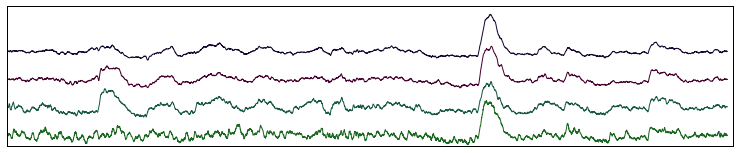

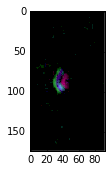

SLP_R
SMP_R
207
superior lateral protocerebrum


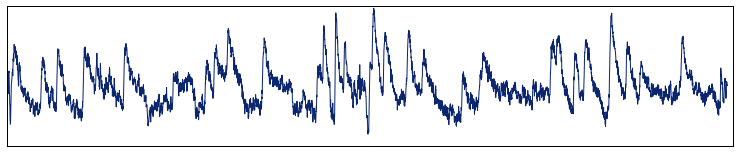

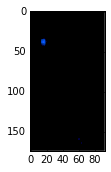

MB_VL_R
SMP_R
22
SMP_R
150
superior medial protocerebrum


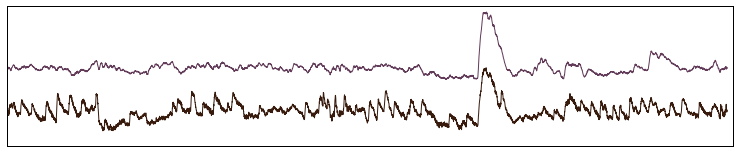

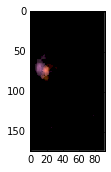

IVLP_R
PLP_R
IPS_R
104
wedge


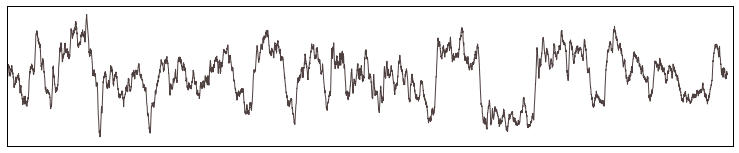

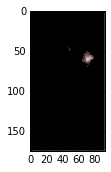

PLP_R
84
posterior lateral protocerebrum


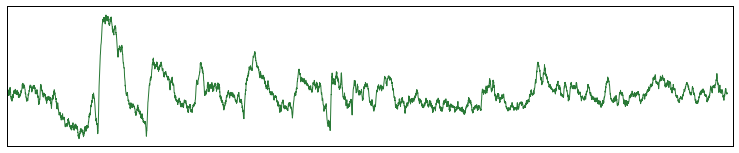

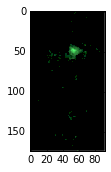

MB_CA_R
2
MB_PED_R
MB_VL_R
MB_CA_R
56
MB_CA_R
75
MB_CA_R
139
LH_R
MB_CA_R
GA_R
193
calyx of adult mushroom body


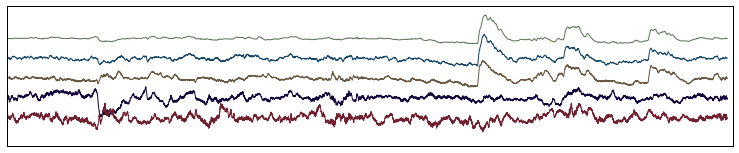

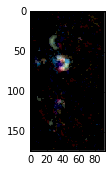

IB_R
SPS_R
16
superior posterior slope


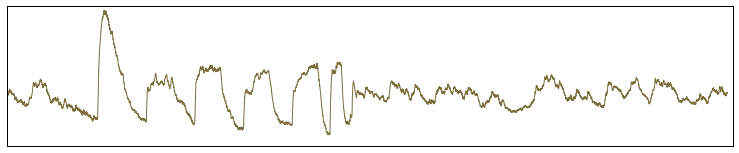

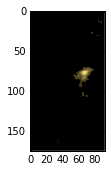

IPS_R
LO_L
LOP_L
4
SPS_R
IPS_R
IPS_L
58
inferior posterior slope


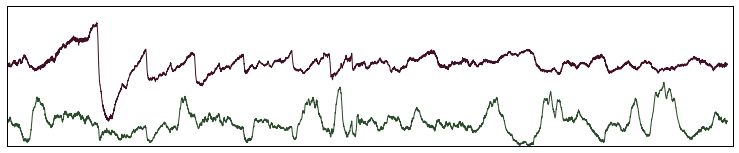

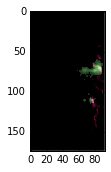

GNG
LO_L
LOP_L
35
adult gnathal ganglion


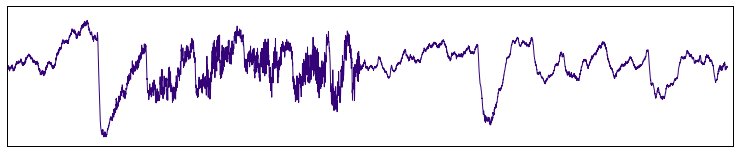

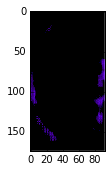

FLA_R
ME_R
GA_R
161
gall


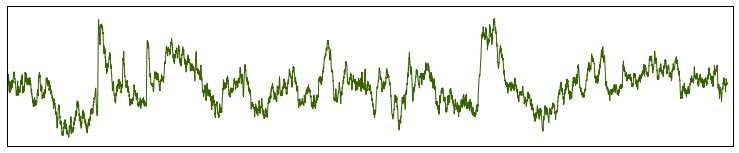

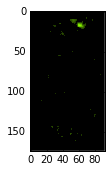

LO_L
ME_L
60
LO_L
87
LO_L
ME_L
89
LO_L
LOP_L
ME_L
93
LO_L
96
LO_L
LOP_L
ME_L
111
LO_L
ME_L
149
LO_L
208
lobula


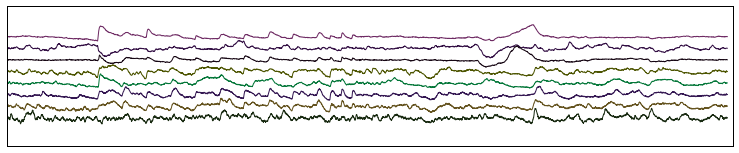

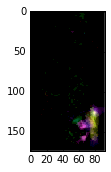

LH_L
53
PB
LH_L
105
LH_L
AL_L
180
lateral horn


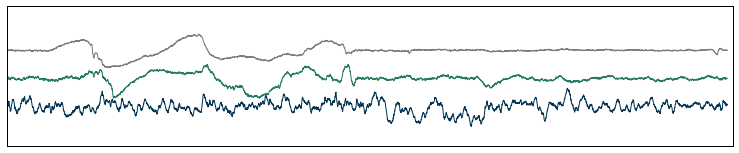

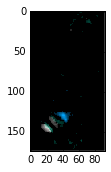

AMMC_L
12
antennal mechanosensory and motor center


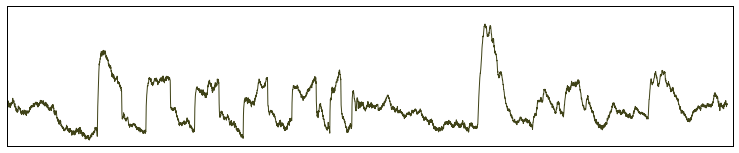

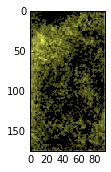

IB_R
IB_L
33
inferior bridge


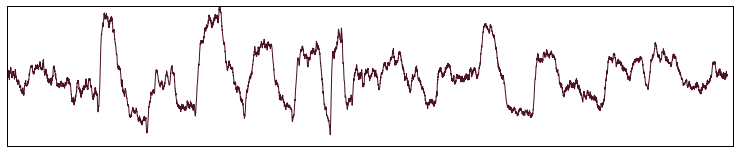

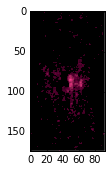

PB
ATL_L
156
PB
ATL_R
ATL_L
160
antler


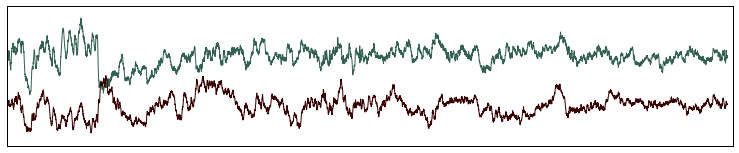

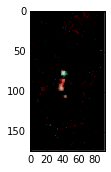

MB_VL_L
21
MB_PED_L
MB_VL_L
MB_ML_L
141
vertical lobe of adult mushroom body


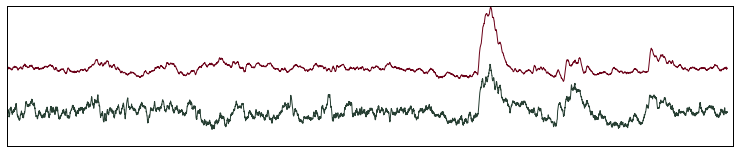

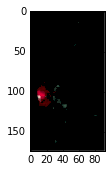

CRE_L
MB_PED_L
MB_ML_L
7
MB_VL_L
MB_ML_L
SIP_L
AOTU_L
19
MB_ML_L
97
MB_VL_L
MB_ML_L
144
medial lobe of adult mushroom body


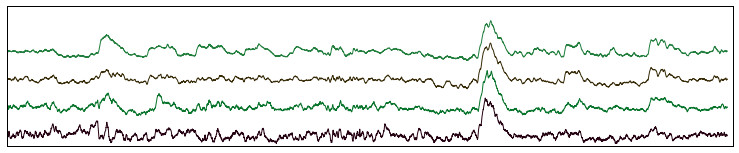

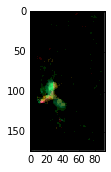

LO_L
LOP_L
ME_L
92
lobula plate


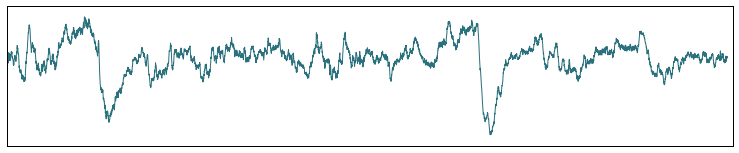

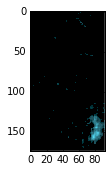

LAL_L
AL_L
25
CRE_R
AL_R
GA_R
AL_L
39
VES_L
AL_L
71
adult antennal lobe


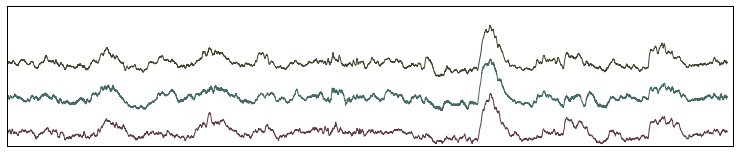

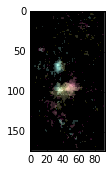

ME_L
45
BU_R
ME_L
47
ME_L
52
LO_L
ME_L
54
LO_L
LOP_L
ME_L
57
LO_L
ME_L
65
ME_L
90
LO_L
ME_L
91
LO_L
ME_L
100
LO_R
FLA_R
LO_L
ME_L
102
ME_L
107
BU_R
LO_L
ME_L
112
LO_L
ME_L
114
ME_L
122
LO_L
ME_L
126
LO_L
ME_L
134
ME_L
138
ME_L
140
ATL_L
ME_L
142
LO_L
ME_L
152
ME_L
153
ME_L
154
ME_L
171
NO
LO_L
ME_L
182
PB
LO_L
ME_L
187
medulla


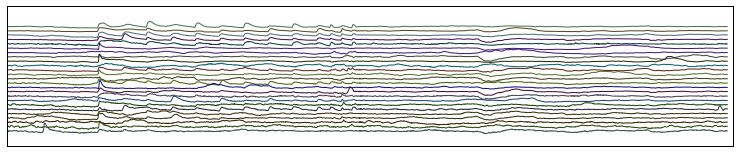

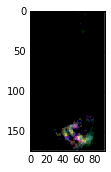

SMP_L
76
SMP_L
95
PB
MB_VL_L
SIP_L
SMP_L
186
superior medial protocerebrum


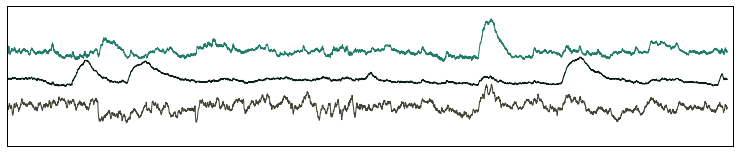

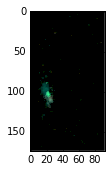

AVLP_L
PVLP_L
106
anterior ventrolateral protocerebrum


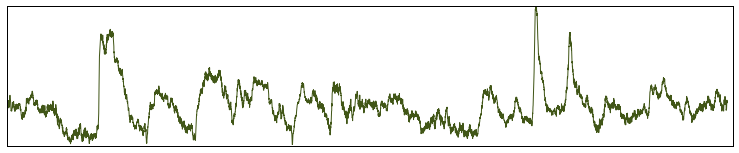

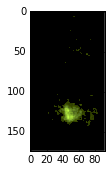

IVLP_L
74
wedge


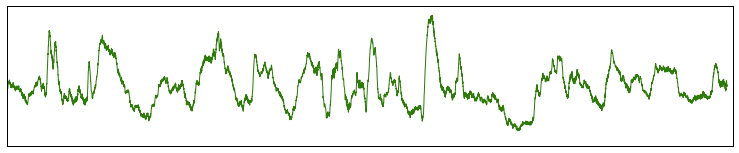

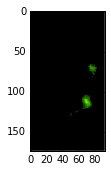

MB_CA_L
148
calyx of adult mushroom body


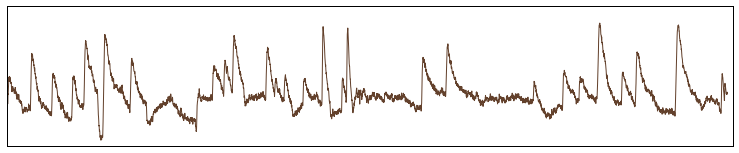

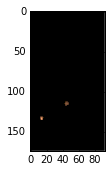

SPS_L
40
superior posterior slope


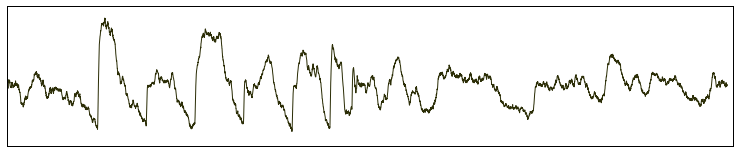

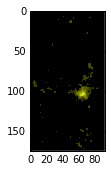

IPS_L
36
BU_L
IPS_L
115
inferior posterior slope


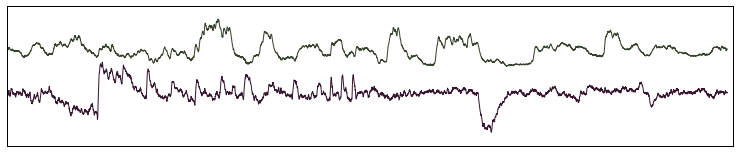

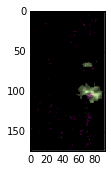

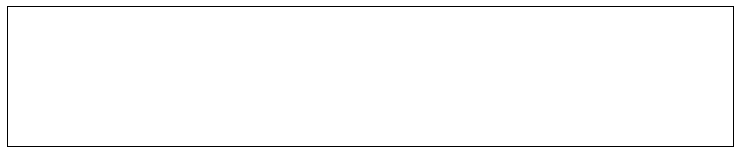

In [31]:
pylab.rcParams['figure.figsize'] = (13, 2.5)

h=5
tot=0
GoodICAnat=np.zeros(S[3])

for l in range(74):
    Final_maps=np.zeros((S[0],S[1],3))
    Fmap=np.zeros((S[0],S[1],3))
    C=np.zeros(3)

    n=0
    for i in range(len(CompMainName)):                    
        Dmmv=np.mean(data[:,:,:,i],2) 
        Dmmv[Dmmv<0.2*np.max(np.max(np.max(Dmmv)))]=0
        C=np.squeeze(np.random.rand(3,1))
        labeled, nrobject=ndimage.label(Dmmv>0)
        
        if CompMainName[i]==Names[l][0] and (sum(CompNameAdd[i,:])<5) and nrobject<200:
            n=n+1            
            
            for k in range(3):
                Fmap[:,:,k]=0.7*Dmmv*C[k]/np.max(C)
            Final_maps=Final_maps+Fmap
            #plt.plot(Time_fluoICA.T,(DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            plt.plot((DT[:,i]/np.sqrt(np.var(DT[:,i]))-h*n+2),color=C/2)
            tot=tot+1
            GoodICAnat[i]=1
            #print(i)
            for j in range(86):
                if CompNameAdd[i,j]==1:                
                    print(Names[np.array(j)][0])
            print(i)
            
                    
    if n!=0:
        print(Names[l][1])

        plt.show()
        FM=Final_maps/np.max(np.max(Final_maps))
        FM[FM<0.1]=0
        plt.imshow(FM,interpolation='none')
        plt.show()
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        


# Reorder by larger sub-regions (~ presumed stimulus to motor)

In [32]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

NewOrder=np.argsort(SmallRegion)

SmallRegion[NewOrder]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  5,  6,  6,  6,  8,  8,  9, 13, 13, 16, 16,
       17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 21, 21, 21, 21, 21, 21, 23, 24, 24, 24, 25, 25, 25, 25,
       26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 29, 29, 29, 32, 32, 32,
       33, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 41, 43, 43, 44,
       44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46,
       47, 47, 47, 47, 47, 47, 47, 48, 48, 49, 49, 49, 49, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 51, 51, 51, 51, 54, 54, 54, 54, 58, 62, 62, 63,
       64, 64, 65, 65, 66, 66, 66, 66, 67, 69, 70, 71, 72, 72, 73, 74, 75])

In [33]:
#Output number of component per region

In [34]:
# from http://stackoverflow.com/questions/3579568/choosing-a-file-in-python-with-simple-dialog
from Tkinter import Tk
from tkFileDialog import askopenfilename

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenamet = askopenfilename() # show an "Open" dialog box and return the path to the selected file
print(filenamet)
nimt=nb.load(filenamet)
Dtemp=np.squeeze(nimt.get_data())
Dtemp.shape

FileNotFoundError: No such file: ''

In [39]:
# Output number of component per region
np.savetxt('/'.join(filename.split('/')[:-1])+'/TimeFluoICA862863.txt',Time_fluoICA)

# Last pruning by hand

In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold =4000;

In [ ]:
if S[2]>5:
    Nstack=5
    Int100=[(i+1)*100/Nstack for i in range(Nstack)]
    Percs=np.percentile(range(S[2]),Int100)
    Indices=np.split(range(S[2]),Percs)
    D1=np.zeros([S[0],S[1],Nstack])
    Dmean=np.squeeze(data[:,:,range(Nstack),2])
    for i in range(Nstack):
        Vmean=np.mean(Dtemp[:,:,Indices[i]],2)
        Dmean[:,:,i]=Vmean
else:
    Nstack=S[2]
    D1=np.zeros([S[0],S[1],S[2]])
    Dmean=data[:,:,range(S[2])]  
    Dmean=np.squeeze(Dtemp[:,:,:])

In [ ]:
plt.imshow(Dmean[:,:,1],cmap=plt.cm.gray)

In [ ]:
S

In [ ]:
my_cmap=plt.cm.jet
my_cmap.set_bad(alpha=0)
Good_ICs=np.zeros(S[3])
Label_ICs=[]
pylab.rcParams['figure.figsize'] = (15, 2.5)

In [ ]:
for j in range(S[3]):

    a=''
    if S[2]>5:
        for i in range(Nstack):
            V=Dmaps[:,:,Indices[i],j]
            D1[:,:,i]=np.max(V,2)
        D2[:,:,:,j]=D1
        D1[D1==0]=np.nan
           
    else:
        for i in range(S[2]):
            V=Dmaps[:,:,i,Order[j]]
            D1[:,:,i]=V 

    #if CompMainName[j] != '':
        print(j)
        print(CompMainName[j])
    for i in range(Nstack):
        plt.subplot(1,5,i+1)
        plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
        plt.imshow(D1[:,:,i], cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
        
    plt.show()
    plt.plot(DT[:,j]/np.sqrt(np.var(DT[:,j])))
    plt.plot(DTroi[:,j]/np.sqrt(np.var(DTroi[:,j]))+3)               

    plt.show()
    a=raw_input()
    
    Label_ICs.append(a)
    if Label_ICs[j]!='':
        Good_ICs[j]=1

In [ ]:
DT.shape

In [ ]:
Good_ICs=np.ones(S[3])

In [ ]:
fn=open('/home/sophie/Desktop/862863GoodICs150.txt','w')
for i in range(S[3]):
    if Good_ICs[i]:
        print>>fn, i
        print>>fn, CompMainName[i]
        print>>fn, Good_ICs[i]

In [ ]:
pylab.rcParams['figure.figsize'] = (20, 8)
Amap=np.zeros((S[0],S[1],S[2],3))
AllMaps=np.zeros((S[0],S[1],S[2],3))
Dmv=np.zeros((S[0],S[1],S[2]))
C=np.zeros((S[3],3))
i=0
for j in range(S[3]): 
    if Good_ICs[j]:
        C[j,:]=C1[j%6][:]
        Dmv[:,:,:]=data[:,:,:,j]/np.sqrt(np.var(np.reshape(data[:,:,:,j],S[0]*S[1]*S[2])))
        Dmv=Dmv-2
        Dmv[Dmv<0]=0

        for k in range(3):
            M=np.max(np.squeeze(np.reshape(Dmv[:,:,:],S[0]*S[1]*S[2])))
            Amap[:,:,:,k]=0.6*Dmv[:,:,:]*C[j,k]/M
        AllMaps=AllMaps+Amap   
    
for i in range(S[2]):
    Rotated=ndimage.rotate(AllMaps[:,:,i,:],-90)
    plt.imshow(Rotated,cmap=my_cmap,interpolation='none')
    Rotated=ndimage.rotate(Df[:,:,:]/MM,-90)
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    fig1=plt.gcf()
    name='/home/sophie/862863stack'+str(i)+'.png'
    fig1.savefig(name)
    plt.show() 
#plt.tight_layout(pad=0,w_pad=0,h_pad=0)

In [ ]:
if len(Label_ICs)<S[3]:
    for j in range(S[3]-len(Label_ICs)):
        Label_ICs.append('')  

In [ ]:
G=Good_ICs.tolist();

In [ ]:
len(Good_ICs)

In [ ]:
G.count(1)

In [29]:
LargerRegionsDic={'':'','AME_R':'OL','LO_R':'OL','NO':'CX','BU_R':'CX','PB':'CX','LH_R':'LH','LAL_R':'LX','SAD':'PENP'
               ,'CAN_R':'PENP','AMMC_R':'PENP','ICL_R':'INP','VES_R':'VMNP','IB_R':'INP','ATL_R':'INP','CRE_R':'INP'
               ,'MB_PED_R':'MB','MB_VL_R':'MB','MB_ML_R':'MB','FLA_R':'PENP','LOP_R':'OL','EB':'CX','AL_R':'AL',
                'ME_R':'OL','FB':'CX','SLP_R':'SNP','SIP_R':'SNP','SMP_R':'SNP','AVLP_R':'VLNP','PVLP_R':'VLNP',
                'IVLP_R':'VLNP','PLP_R':'VLNP','AOTU_R':'VLNP','GOR_R':'VMNP','MB_CA_R':'MB','SPS_R':'VMNP',
                'IPS_R':'VMNP','SCL_R':'INP','EPA_R':'VMNP','GNG':'GNG','PRW':'PENP','GA_R':'LX','AME_L':'OL'
                ,'LO_L':'OL','BU_L':'CX','LH_L':'LH','LAL_L':'LX','CAN_L':'PENP','AMMC_L':'PENP','ICL_L':'INP',
                'VES_L':'VMNP','IB_L':'INP','ATL_L':'INP','CRE_L':'INP','MB_PED_L':'MB','MB_VL_L':'MB',
                'MB_ML_L':'MB','FLA_L':'PENP','LOP_L':'OL','AL_L':'AL','ME_L':'OL','SLP_L':'SNP','SIP_L':'SNP',
                'SMP_L':'SNP','AVLP_L':'VLNP','PVLP_L':'VLNP','IVLP_L':'VLNP','PLP_L':'VLNP','AOTU_L':'VLNP',
                'GOR_L':'VMNP','MB_CA_L':'MB','SPS_L':'VMNP','IPS_L':'VMNP','SCL_L':'INP','EPA_L':'VMNP','GA_L':'LX'}

SmallRegionsSorted=['ME_L','ME_R','LO_R','LO_L','LOP_R','LOP_L','AME_R','AME_L',
                  'PLP_R','PLP_L','PVLP_R','PVLP_L','AVLP_R','AVLP_L','AOTU_R','AOTU_L','IVLP_R','IVLP_L',
                  'AL_R','AL_L',
                  'MB_CA_R','MB_CA_L','MB_PED_R','MB_PED_L','MB_VL_R','MB_VL_L','MB_ML_R','MB_ML_L',
                  'SMP_R','SMP_L','SIP_R','SLP_L','SLP_R','SIP_L',
                  'LH_R','LH_L',                  
                  'CRE_R','CRE_L','ICL_R','ICL_L','SCL_R','SCL_L','IB_R','IB_L','ATL_R','ATL_L',
                  'EB','PB','NO','FB',
                  'BU_R','BU_L','LAL_R','LAL_L','GA_R','GA_L',
                  'GOR_R','GOR_L','EPA_R','EPA_L','VES_R','VES_L','SPS_R','SPS_L','IPS_R','IPS_L',
                  'AMMC_R','AMMC_L','SAD','FLA_R','FLA_L','PRW','CAN_R','CAN_L',
                  'GNG','']

Tozip=range(len(SmallRegionsSorted))
SmallRegionsDic=dict(zip(SmallRegionsSorted,Tozip))

LargerRegion=[LargerRegionsDic[CompMainName[i]] for i in range(S[3])]

LargerRegionInd={ 'OL':1,'VLNP':2,'VMNP':3,'AL':4,'MB':5,'LH':6,'SNP':7,'CX':8,'LX':9,'INP':10,'PENP':11,'GNG':12,'':13}

LargerRegionI=np.array([LargerRegionInd[LargerRegion[i]] for i in range(S[3])])

SmallRegion=np.array([SmallRegionsDic[CompMainName[i]] for i in range(S[3])])

NewOrder=np.argsort(SmallRegion)

SmallRegion[NewOrder]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  4,  5,  6,  6,  6,  8,  8,  9, 13, 13, 16, 16,
       17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 21, 21, 21, 21, 21, 21, 23, 24, 24, 24, 25, 25, 25, 25,
       26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 29, 29, 29, 32, 32, 32,
       33, 34, 34, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 41, 43, 43, 44,
       44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46,
       47, 47, 47, 47, 47, 47, 47, 48, 48, 49, 49, 49, 49, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 51, 51, 51, 51, 54, 54, 54, 54, 58, 62, 62, 63,
       64, 64, 65, 65, 66, 66, 66, 66, 67, 69, 70, 71, 72, 72, 73, 74, 75])

# Plot all components together

In [35]:
if S[2]>5:
    Final_map=np.zeros([S[0],S[1],5,3])
    Fmaps=np.zeros([S[0],S[1],5,3])
else:
    Final_map=np.zeros([S[0],S[1],3]) 
    Fmaps=np.zeros([S[0],S[1],3])    
C=np.zeros([S[3],3])

In [36]:
C1=np.zeros([6,3])
C1[0][:]=(1,0,0)
C1[1][:]=(0,1,0)
C1[2][:]=(0,0,1)
C1[3][:]=(0.8,0.8,0)
C1[4][:]=(0,1,1)
C1[5][:]=(1,0,1)
S1=DT.shape

In [37]:
GoodICo=Good_ICs[NewOrder]
D2o=D2[:,:,:,NewOrder]
LargerRegionIo=LargerRegionI[NewOrder]
Ind=np.array(range(S[3]))
Indexo=Ind[NewOrder]
DTo=DT[:,NewOrder]

NameError: name 'Good_ICs' is not defined

In [ ]:
C=np.zeros((S[3],3))
i=0
for j in range(S[3]):  
    if LargerRegionIo[j]<12 and GoodICo[j]:
        C[j,:]=C1[i%6][:]
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2o[:,:,:,j],S[0]*S[1]*5)))
            Fmaps[:,:,:,k]=0.6*D2o[:,:,:,j]*C[j,k]/M
        Final_map=Final_map+Fmaps
        #print(Indexo[j])
        i=i+1

In [ ]:
np.max(np.max(np.max(Final_map[:,:,:,])))

In [ ]:
pylab.rcParams['figure.figsize'] = (15, 6)
C2=np.zeros(3)

Df=np.zeros([S[0],S[1],5,3]) 
  
for i in range(3):
    #Df[:,:,:,i]=Final_map[:,:,:,i]+Dmean/50
    #Df=Df/(np.max(np.max(Df)))
    Df[:,:,:,i]=Final_map[:,:,:,i]
    #Df=Df/(np.max(np.max(Df)))
    
if S[2]>5:
    N=Nstack
else:
    N=S[2]
for i in range(N):
    #if Good_ICs[j]:
        plt.subplot(1,N,i+1)
        plt.imshow(Dmean[:,:,i],cmap=plt.cm.gray)
        plt.imshow(Df[:,:,i,:],cmap=my_cmap,interpolation='none')
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
plt.tight_layout(pad=0,w_pad=0,h_pad=0)
  

In [ ]:
pylab.rcParams['figure.figsize'] = (10, 15)
h=0.5
i=0

for j in range(S[3]):
    if GoodICo[j]:
        plt.plot(Time_fluoICA,(DTo[:,j]+h*i),color=C[j,:]) 
        i=i+1
plt.xlim([np.min(Time_fluoICA),np.max(Time_fluoICA)])
plt.ylim([-0.5,h*i])
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
plt.show()

In [ ]:
k=0
J=np.zeros(len(GoodICo[GoodICo==1]))
for j in range(len(GoodICo)):
    if GoodICo[j]:
        print(k)
        print([CompMainName[Indexo[j]]])
        J[k]=j
        k=k+1

In [ ]:
Sets=[range(25),range(25,38),range(38,43),range(43,53),range(53,76),range(76,82),range(82,89),
      range(89,92),range(92,98),range(98,101),range(101,107),range(107,113),range(113,117),range(117,119)]

In [ ]:
pylab.rcParams['figure.figsize'] = (12, 6)
SetId=np.zeros(1000)
n=0

for i in range(len(Sets)):
    
    Final_map2=np.zeros([S[0],S[1],3]) 
    Fmaps2=np.zeros([S[0],S[1],3]) 
    Final_map3=np.zeros([S[0],S[1],5,3]) 
    Fmaps3=np.zeros([S[0],S[1],5,3])     
     
    if type(Sets[i])==list:
        for j in np.array(Sets[i]):
            C=np.zeros((S[3],3))
            C[j,:]=C1[j%6][:]
            SetId[n]=i
            n=n+1
            for k in range(3):           
                M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1]*5)))
                Fmaps2[:,:,k]=0.9*np.mean(D2o[:,:,:,J[j]],2)*C[j,k]/M
                for l in range(5):
                    M=np.max(np.squeeze(np.reshape(D2o[:,:,l,J[j]],S[0]*S[1],5)))
                    Fmaps3[:,:,l,k]=0.9*D2o[:,:,l,J[j]]*C[j,k]/M                
            Final_map2=Final_map2+Fmaps2
            Final_map3=Final_map3+Fmaps3            
                
    else:
        j=Sets[i]
        C[j,:]=C1[j%6][:]
        SetId[n]=i
        n=n+1
        for k in range(3):           
            M=np.max(np.squeeze(np.reshape(D2o[:,:,:,J[j]],S[0]*S[1]*5)))
            Fmaps2[:,:,k]=0.9*np.mean(D2o[:,:,:,J[j]],2)*C[j,k]/M
            for l in range(5):
                M=np.max(np.squeeze(np.reshape(D2o[:,:,l,J[j]],S[0]*S[1],5)))
                Fmaps3[:,:,l,k]=0.9*D2o[:,:,l,J[j]]*C[j,k]/M 
        Final_map2=Final_map2+Fmaps2
        Final_map3=Final_map3+Fmaps3   
                
    Df=np.zeros([S[0],S[1],3]) 
    Df2=np.zeros([S[0],S[1],5,3]) 
    
    for l in range(3):
        Df[:,:,l]=Final_map2[:,:,l]+np.mean(Dmean,2)/300
        for m in range(5):
            Df2[:,:,m,l]=Final_map3[:,:,m,l]+np.mean(Dmean,2)/300
    MM=np.max(np.max(Df))
    
    Rotated=ndimage.rotate(Df[:,:,:]/MM,-90)
    a=plt.imshow(Rotated,cmap=my_cmap,interpolation='none')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    
    fig1=plt.gcf()
    name='/home/sophie/862863image'+str(i)+'.png'
    fig1.savefig(name)
    plt.show()

In [38]:
Tstim=np.arange(0,np.max(Time_fluoICA),0.001)
Tstim2=Tstim-np.max(Time_fluo862)
Flashes=np.zeros(Tstim.shape[0])
Odor=np.zeros(Tstim.shape[0])
for i in range(Tstim.shape[0]):
    if (Tstim[i]>10 and Tstim[i]<12) or (Tstim[i]>14 and Tstim[i]<16) or (Tstim[i]>18 and Tstim[i]<20) or (Tstim[i]>22 and Tstim[i]<24)or (Tstim[i]>26 and Tstim[i]<28)or (Tstim[i]>30and Tstim[i]<32):
        Flashes[i]=1
    if (Tstim2[i]>12 and Tstim2[i]<14) or (Tstim2[i]>19 and Tstim2[i]<21) or (Tstim2[i]>26 and Tstim2[i]<28):
        Odor[i]=1
Flashes[Flashes==0]=np.nan
Odor[Odor==0]=np.nan 

In [40]:
np.max(Time_fluo862)

35.595852098795213

In [ ]:
C=np.zeros((S[3],3))
i=0
for j in range(S[3]):  
    if LargerRegionIo[j]<12 and GoodICo[j]:
        C[j,:]=C1[i%6][:]
        i=i+1

pylab.rcParams['figure.figsize'] = (8, 30)
h=10
i=0
plt.plot(Tstim,Flashes+8,linewidth=8,color='purple')
plt.plot(Tstim,Odor+8,linewidth=8,color='deeppink')

for j in range(S[3]):
    if GoodICo[j]:
        plt.plot(Time_fluoICA,(DTo[:,j]/np.sqrt(np.var(DTo[:,j]))-h*i-h*SetId[i]),color=C[j,:]) 
        i=i+1
        
plt.plot(Tstim,Flashes-h*i-h*np.max(SetId)-2,linewidth=8,color='purple')
plt.plot(Tstim,Odor-h*i-h*np.max(SetId)-2,linewidth=8,color='deeppink')

plt.plot(Tstim,Flashes-h*i-h*np.max(SetId)+514,linewidth=4,color='purple')
plt.plot(Tstim,Odor-h*i-h*np.max(SetId)+514,linewidth=4,color='deeppink')

plt.xlim([np.min(Time_fluoICA),np.max(Time_fluoICA)])
plt.ylim([-h*i-h*np.max(SetId)-8,12])
frame1 = plt.gca()
frame1.axes.get_yaxis().set_visible(False)
frame1.axes.set_xlabel('Time (s)')
frame1.xaxis.set_tick_params(width=2,length=5)
matplotlib.rcParams.update({'font.size': 25})
plt.show()